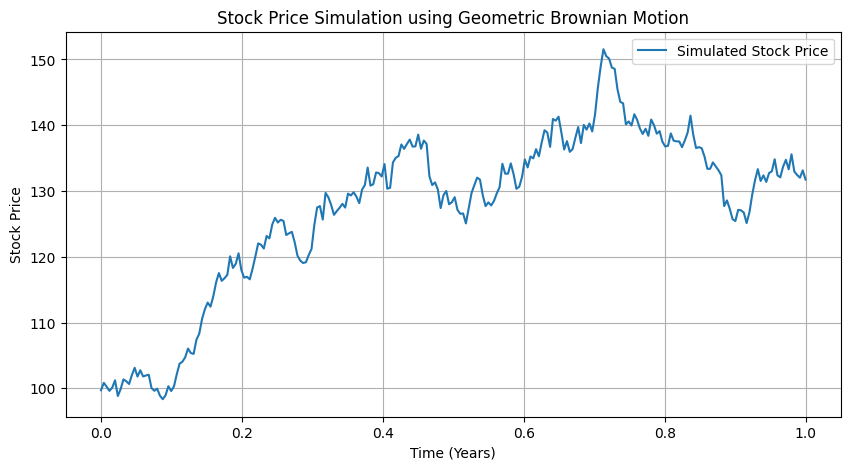

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class StockMarketSimulation:
    def __init__(self, S0, mu, sigma, T, N):
        self.S0 = S0  # Initial stock price
        self.mu = mu  # Expected return
        self.sigma = sigma  # Volatility
        self.T = T  # Time in years
        self.N = N  # Number of time steps
        self.dt = T / N  # Size of each time step

    def simulateBrownianMotion(self):
        # 1. Time array
        t = np.linspace(0, self.T, self.N)

        # 2. Simulate Brownian motion
        # Generate N random standard normal values
        random_shocks = np.random.normal(0, 1, self.N)
        W = np.cumsum(random_shocks) * np.sqrt(self.dt)  # Cumulative sum simulates Brownian motion

        # 3. GBM formula
        # S(t) = S0 * exp((mu - 0.5*sigma^2)*t + sigma*W(t))
        S = self.S0 * np.exp((self.mu - 0.5 * self.sigma**2) * t + self.sigma * W)

        # 4. Plot the simulated stock price
        plt.figure(figsize=(10, 5))
        plt.plot(t, S, label="Simulated Stock Price")
        plt.title("Stock Price Simulation using Geometric Brownian Motion")
        plt.xlabel("Time (Years)")
        plt.ylabel("Stock Price")
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
stock1 = StockMarketSimulation(S0=100, mu=0.1, sigma=0.2, T=1, N=252)
stock1.simulateBrownianMotion()